## Ouverture des données 

In [1]:
#Importation des modules de Python 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Ouverture de notre jeux de données principale
usa =  pd.read_csv('usa2.csv', sep=',', encoding='ISO-8859-1')

#Suppresion de la 1er colonne suivante dérengeante
usa = usa.drop(['Unnamed: 0'],axis=1)

#Renommage des colonnes
usa = usa.rename(columns = {'POP10':'population',
                             'WHITEp':'pop_blanche',
                             'BLACKp':'pop_noir',
                             'HISPAp':'pop_hispanique',
                             'ASIANp':'pop_asiatique',
                             'OTHERp' :'pop_autres',
                             'UNDER18p': '-18ans',
                             'F18TO24p':'18_24ans',
                             'F25TO44p':'25_44ans',
                             'F45TO64p':'45_64ans',
                             'MORE65p':'+65ans',
                             'NODIPLOMp':'non-diplomés',
                             'F9TO12THp' : 'lycée',
                             'UNDERGRADp':'bac',
                             'GRADUATEp':'université',
                             'F0TO20p':'-20d',
                             'F20TO40p':'20_40d',
                             'F40TO60p':'40_60d',
                             'F60TO80p' : '60_80d',
                             'F80TO100p' : '+80d'})

usa.head(10)

,cbssa,name,state,NameState,PartUSA,Political,Candidat,BorderSea,Anglais_Off,population,...,+65ans,non-diplomés,lycée,bac,université,-20d,20_40d,40_60d,60_80d,+80d
0,10100,Aberdeen,SD,South Dakota,North-West,Republicain,Trump,No,Yes,40602,...,16.64,4.88,37.82,31.41,25.89,18.21,22.36,20.66,24.30,14.47
1,10140,Aberdeen,WA,Washington,North-East,Republicain,Trump,Yes,No,72797,...,16.28,5.72,40.47,39.44,14.37,20.49,26.35,19.84,21.07,12.25
2,10180,Abilene,TX,Texas,South-West,Republicain,Trump,No,No,165252,...,13.67,6.87,39.66,31.93,21.55,20.64,25.17,19.09,20.50,14.60
3,10220,Ada,OK,Oklahoma,South-West,Republicain,Trump,No,No,37492,...,14.86,5.09,40.23,28.16,26.52,24.44,24.76,18.53,20.73,11.55
4,10300,Adrian,MI,Michigan,North-East,Republicain,Trump,No,No,99892,...,14.60,3.71,43.81,33.05,19.42,18.21,23.81,19.03,24.78,14.17
5,10420,Akron,OH,Ohio,North-East,Democrate,Clinton,No,No,703200,...,14.19,2.40,41.01,28.23,28.35,19.44,20.94,18.41,22.62,18.58
6,10460,Alamogordo,NM,New Mexico,South-West,Republicain,Trump,No,No,63797,...,14.97,7.64,36.30,38.59,17.47,24.72,26.37,19.51,19.12,10.28
7,10500,Albany,GA,Georgia,South-East,Democrate,Clinton,No,Yes,157308,...,11.99,6.32,46.68,30.91,16.09,29.28,24.08,16.34,18.18,12.11
8,10540,Albany,OR,Oregon,North-West,Republicain,Trump,No,No,116672,...,15.42,3.31,40.64,39.90,16.15,19.64,22.61,21.00,24.04,12.70
9,10580,Albany-Schenectady-Troy,NY,New-York,North-East,Republicain,Trump,No,No,870716,...,14.04,2.74,34.33,29.35,33.57,14.89,17.97,16.49,24.91,25.74


#### Matrice de corrélation 

On a la matrice de corréation qui est pratique pour voir les différentes corrélations pour tous nos variables quantitatives

In [3]:
#Importation du modules Seaborn

import seaborn as sns

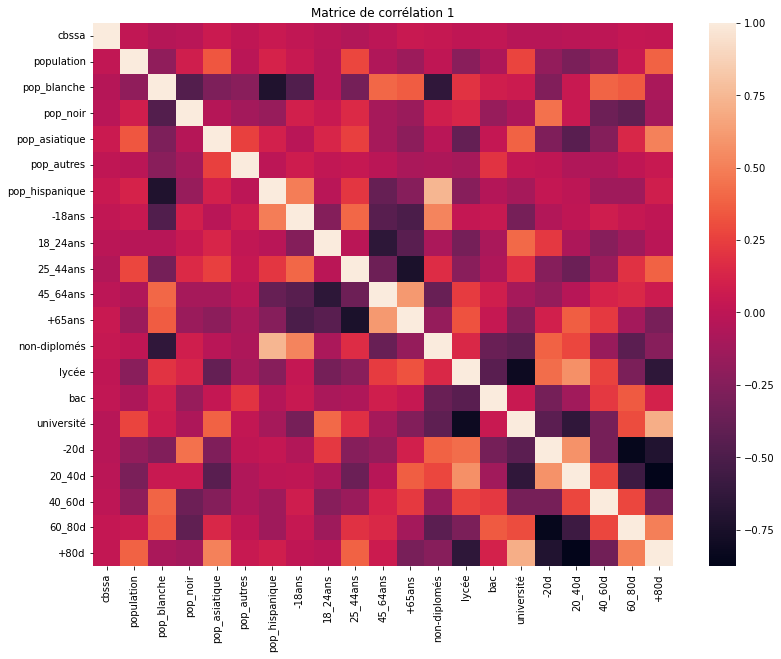

In [4]:
# Matrice des corrélation 

plt.figure(figsize=(13,10))

sns.heatmap(usa.corr())
plt.title('Matrice de corrélation 1')
plt.show()

## Regression linéaire 

On utilisera cette méthode dans le cadre de notre projet pour étudier graphiquement les liaisons que l’on va déjà analyser auparavant et de y trouver une droite d’équation

In [5]:
#On peut faire une regresion linéaire en important une librairie
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

### Les non-diplômés et la population hispanique


In [6]:
#regression linéaire


Y = pd.DataFrame(usa['pop_hispanique'])
X = usa[['non-diplomés']]
X = X.copy() # On modifiera X, on en crée donc une copie
X['intercept'] = 1.
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)

#On cherche le coeffcient directeurs
a = result.params['non-diplomés']

# L'ordonnée a l'origine
b = result.params['intercept']

result.params

non-diplomés    2.843176
intercept      -5.881382
dtype: float64

On y voit que cette fonction est  Y = 2.84*X-5.88


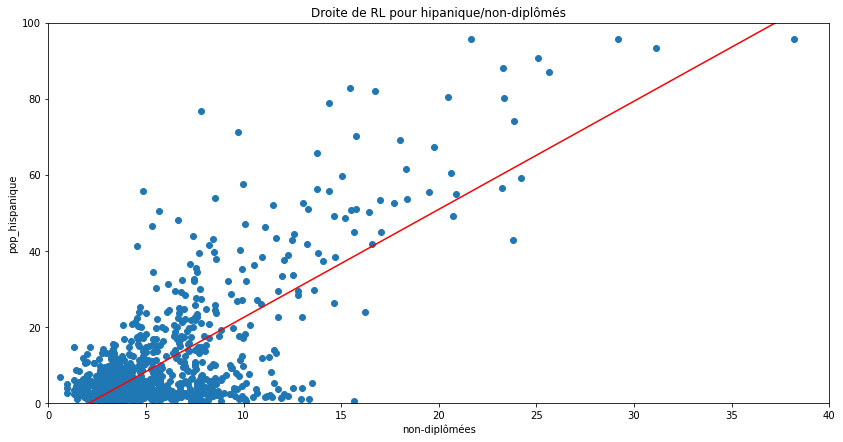

In [7]:
print(f'On y voit que cette fonction est  Y = {round(a,2)}*X{round(b,2)}')

#on affiche graphiquement la droite de regression

plt.figure(figsize=(14,7))

plt.scatter(usa['non-diplomés'],usa['pop_hispanique'])
plt.plot(np.arange(len(usa['pop_hispanique'])),[a*x+b for x in np.arange(len(usa['pop_hispanique']))],c='r')
plt.xlabel("non-diplômées")
plt.ylabel("pop_hispanique")
plt.xlim(0,40)
plt.ylim(0,100)
plt.title("Droite de RL pour hipanique/non-diplômés")
plt.savefig("RegLin_hispa_no-diplome.png")
plt.show()

### Les diplômés universitaire et les personnes ayant un revenu annuel supérieur à 60 000 dollars


##### Création d'une nouvelle variable



In [8]:
#On créer une variable de revenu de plus de 60k $ 


usa["+60"] = usa['60_80d']+usa['+80d']

In [9]:
usa.columns


Index(['cbssa', 'name', 'state', 'NameState', 'PartUSA', 'Political',
       'Candidat', 'BorderSea', 'Anglais_Off', 'population', 'pop_blanche',
       'pop_noir', 'pop_asiatique', 'pop_autres', 'pop_hispanique', '-18ans',
       '18_24ans', '25_44ans', '45_64ans', '+65ans', 'non-diplomés', 'lycée',
       'bac', 'université', '-20d', '20_40d', '40_60d', '60_80d', '+80d',
       '+60'],
      dtype='object')

In [10]:
#regression linéaire


Y = pd.DataFrame(usa['+60'])
X = usa[['université']]
X = X.copy() # On modifiera X, on en crée donc une copie
X['intercept'] = 1.
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)

#On cherche le coeffcient directeurs
a = result.params['université']

# L'ordonnée a l'origine
b = result.params['intercept']

result.params

université     0.625350
intercept     23.777932
dtype: float64

On y voit que cette fonction est  Y = 0.63*X + 23.78


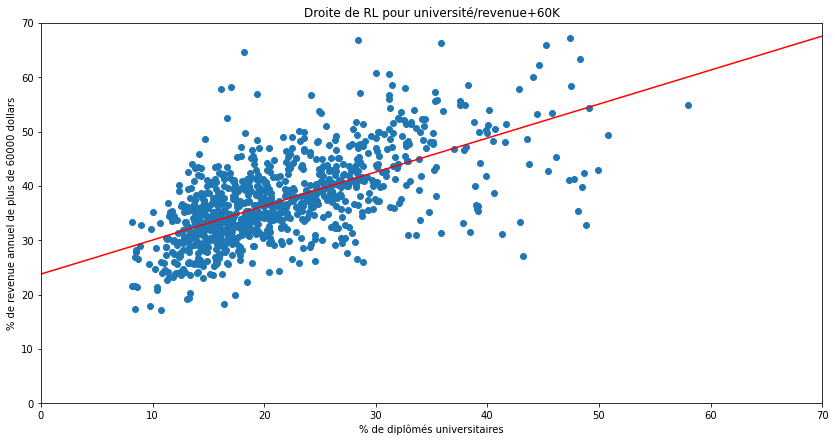

In [11]:
print(f'On y voit que cette fonction est  Y = {round(a,2)}*X + {round(b,2)}')

#on affiche graphiquement la droite de regression

plt.figure(figsize=(14,7))

plt.scatter(usa['université'],usa['+60'])
plt.plot(np.arange(len(usa['+60'])),[a*x+b for x in np.arange(len(usa['université']))],c='r')
plt.xlabel("% de diplômés universitaires")
plt.ylabel("% de revenue annuel de plus de 60000 dollars")
plt.xlim(0,70)
plt.ylim(0,70)
plt.title("Droite de RL pour université/revenue+60K")
plt.savefig("RegLin2_+-0d_université.png")
plt.show()

## Méthode des sommes des carrées

Le but de trouver la qualité de prediction faite par la regression linéaire par la méthode de somme des moindres carrées

On l'utilisera pour nos 2 liaisons

##### Diplômés universitaire et les revenues de plus de 60 000$

In [12]:
#On a les variables initiale

x = usa[['université']]
y = usa[['+60']]


In [13]:
#Conversion en une liste

x = list(usa["université"])

#Création d'une liste de prédiction de y
pred_y = list()


for i in range(len(x)):
    pred_y.append(round((0.62*x[i])+23.78,2))

#5 premiers éléments de la valeur prédis
pred_y[:5]

[39.83, 32.69, 37.14, 40.22, 35.82]

In [14]:
### Calcul de la Somme des Carrées Expliqués

SCE = 0
mean_y = np.mean(y)

for i in range(len(pred_y)):
    res = (pred_y[i]-mean_y)**2
    SCE += res

print("La Somme des Carrées Expliqués est de {}".format(SCE))


### Calcul de la Somme des Carrées Résiduels

SCR = 0
y = list(usa['+60'])


for i in range(len(pred_y)):
    res = (y[i]-pred_y[i])**2
    SCR += res
    
print("La Somme des Carrées Résiduels est de {}".format(SCR))


# Calcul de la Somme des Carrées Totales

SCT = SCE + SCR

print("La Somme des Carrées Totales est de {}".format(SCT))


#Coefficient de détermination 

R = SCE/SCT

print("Le coefficient de détermination  est de {}".format(R))


La Somme des Carrées Expliqués est de +60    24094.182188
dtype: float64
La Somme des Carrées Résiduels est de 35617.72710000002
La Somme des Carrées Totales est de +60    59711.909288
dtype: float64
Le coefficient de détermination  est de +60    0.403507
dtype: float64


##### Population hispanique et les non-diplômés 

In [19]:
#On a les variables initiale

x = usa[['non-diplomés']]
y = usa[['pop_hispanique']]



#Conversion en une liste

x = list(usa["non-diplomés"])

#Création d'une liste de prédiction de y
pred_y = list()


for i in range(len(x)):
    pred_y.append(round((2.84*x[i])-5.88,2))

#5 premiers éléments de la valeur prédis
pred_y[:5]

[7.98, 10.36, 13.63, 8.58, 4.66]

In [20]:
### Calcul de la Somme des Carrées Expliqués

SCE = 0
mean_y = np.mean(y)

for i in range(len(pred_y)):
    res = (pred_y[i]-mean_y)**2
    SCE += res

print("La Somme des Carrées Expliqués est de {}".format(SCE))


### Calcul de la Somme des Carrées Résiduels

SCR = 0
y = list(usa['+60'])


for i in range(len(pred_y)):
    res = (y[i]-pred_y[i])**2
    SCR += res
    
print("La Somme des Carrées Résiduels est de {}".format(SCR))


# Calcul de la Somme des Carrées Totales

SCT = SCE + SCR

print("La Somme des Carrées Totales est de {}".format(SCT))


#Coefficient de détermination 

R = SCE/SCT

print("Le coefficient de détermination  est de {}".format(R))



La Somme des Carrées Expliqués est de pop_hispanique    122710.97088
dtype: float64
La Somme des Carrées Résiduels est de 876610.2664999989
La Somme des Carrées Totales est de pop_hispanique    999321.23738
dtype: float64
Le coefficient de détermination  est de pop_hispanique    0.122794
dtype: float64
